# Background
---

# Prior and Simulations
---

In [1]:
from glass_sim import *
import scipy as sp
import pickle

## 1. Prior Parameters: $\bm{\theta}\sim P(\bm{\theta})$

In [22]:
def prior_param_samples(h_range, Oc_range, Ob_range, type, n_samples):
    assert isinstance(h_range, tuple) and len(h_range) == 2, "h_range must be a tuple of (min, max)"
    assert isinstance(Oc_range, tuple) and len(Oc_range) == 2, "Oc_range must be a tuple of (min, max)"
    assert isinstance(Ob_range, tuple) and len(Ob_range) == 2, "Ob_range must be a tuple of (min, max)"
    assert type in ["uniform", "normal"], "type must be either 'uniform' or 'normal'"
    assert isinstance(n_samples, int) and n_samples > 0, "n_samples must be a positive integer"
    if type == "uniform":
        h_samples = np.random.uniform(h_range[0], h_range[1], n_samples)
        Oc_samples = np.random.uniform(Oc_range[0], Oc_range[1], n_samples)
        Ob_samples = np.random.uniform(Ob_range[0], Ob_range[1], n_samples)
        samples = np.vstack((h_samples, Oc_samples, Ob_samples)).T
    elif type == "normal":
        cov = np.diag([h_range[1] - h_range[0], Oc_range[1] - Oc_range[0], Ob_range[1] - Ob_range[0]])**2 / 12
        mean = [(h_range[0] + h_range[1]) / 2, (Oc_range[0] + Oc_range[1]) / 2, (Ob_range[0] + Ob_range[1]) / 2]
        samples = np.random.multivariate_normal(mean, cov, n_samples)
    return samples


h_range = (0.6, 0.8)
Oc_range = (0.2, 0.4)
Ob_range = (0.03, 0.05)
n_samples = 1000
uniform_samples = prior_param_samples(h_range, Oc_range, Ob_range, "uniform", n_samples)
print("Uniform Samples:\n", uniform_samples)
normal_samples = prior_param_samples(h_range, Oc_range, Ob_range, "normal", n_samples)
print("Normal Samples:\n", normal_samples)


Uniform Samples:
 [[0.61472658 0.39276254 0.03335395]
 [0.78487477 0.20699569 0.04902409]
 [0.61452539 0.31156078 0.04228655]
 ...
 [0.67568812 0.34656609 0.04528984]
 [0.69783261 0.30375066 0.04894499]
 [0.62556569 0.23469396 0.04522031]]
Normal Samples:
 [[0.73736912 0.38790234 0.03675863]
 [0.67394798 0.20653746 0.04961637]
 [0.65030359 0.27417589 0.04859693]
 ...
 [0.59869793 0.33512085 0.03878393]
 [0.70013817 0.3608395  0.04427818]
 [0.67794315 0.28464517 0.03347685]]


##  2. Simulated Data: $\bm{x}|\bm{\theta}$

In [23]:
param_samples = []
cls_samples = []

for i in range(uniform_samples.shape[0]):
    cosmology = {}
    cosmology['h'], cosmology['Oc'], cosmology['Ob'] = uniform_samples[i] # unpacking
    # sim = lensing_cls_sim(cosmology)
    param_samples.append(sim['params'])
    cls_samples.append(sim['cls'])
param_samples = np.array(param_samples)
cls_samples = np.array(cls_samples) 

# with open('sbi_demo_data.pkl', 'wb') as f:
    # pickle.dump({'params': param_samples, 'cls': cls_samples}, f)

17it [00:00, 31.02it/s]
15it [00:00, 34.17it/s]
18it [00:00, 37.12it/s]
16it [00:00, 35.52it/s]
17it [00:00, 35.56it/s]
15it [00:00, 36.76it/s]
15it [00:00, 34.71it/s]
16it [00:00, 36.13it/s]
15it [00:00, 36.17it/s]
14it [00:00, 36.49it/s]
15it [00:00, 36.37it/s]
14it [00:00, 35.86it/s]
13it [00:00, 34.70it/s]
18it [00:00, 35.15it/s]
19it [00:00, 37.11it/s]
14it [00:00, 35.47it/s]
16it [00:00, 34.62it/s]
17it [00:00, 36.69it/s]
14it [00:00, 36.51it/s]
15it [00:00, 37.29it/s]
14it [00:00, 35.37it/s]
14it [00:00, 36.18it/s]
17it [00:00, 36.27it/s]
18it [00:00, 34.80it/s]
17it [00:00, 34.82it/s]
16it [00:00, 36.90it/s]
17it [00:00, 37.30it/s]
18it [00:00, 35.74it/s]
14it [00:00, 36.09it/s]
14it [00:00, 33.44it/s]
14it [00:00, 37.80it/s]
17it [00:00, 37.35it/s]
14it [00:00, 36.80it/s]
17it [00:00, 35.88it/s]
14it [00:00, 35.29it/s]
15it [00:00, 35.95it/s]
17it [00:00, 34.88it/s]
15it [00:00, 35.56it/s]
17it [00:00, 37.16it/s]
17it [00:00, 36.70it/s]
15it [00:00, 36.99it/s]
16it [00:00, 35.

[[0.61472658 0.39276254 0.03335395]
 [0.78487477 0.20699569 0.04902409]
 [0.61452539 0.31156078 0.04228655]
 ...
 [0.67568812 0.34656609 0.04528984]
 [0.69783261 0.30375066 0.04894499]
 [0.62556569 0.23469396 0.04522031]]
[[1.13918457e-09 1.59512792e-08 5.06079500e-08 ... 1.36070607e-09
  1.25186004e-09 1.42119535e-09]
 [1.70528808e-10 1.33758420e-08 3.30221996e-08 ... 3.94849466e-10
  3.59168858e-10 3.90911533e-10]
 [5.37669088e-10 1.38230047e-08 4.31993431e-08 ... 6.75661852e-10
  6.28077520e-10 7.10073215e-10]
 ...
 [8.49301187e-10 1.64105173e-08 4.75726437e-08 ... 1.20800157e-09
  1.09947196e-09 1.22787685e-09]
 [5.63246218e-10 1.55992898e-08 4.37180555e-08 ... 8.99398125e-10
  8.19294323e-10 9.08845984e-10]
 [2.44435967e-10 1.11586880e-08 3.49771137e-08 ... 2.86283691e-10
  2.68441691e-10 3.01715220e-10]]


# Dimensionality reduction
---

## Linear compression
Let $\{\mathbf{x}_1,...,\mathbf{x}_N\}$ be the set of simulated data with corresponding.  
$$
\tilde{\mathbf{x}}_{(r\times1)} = T_{(r\times d)}\:\mathbf{x}_{(d\times1)}
$$
$T$ can be obtained via:

1. Canoncical correlation analysis
    - Maximises the correlation between the parameters and data (also could be written as maximising the mutual information).
    - Use canonical data vectors as compressed data
1. MOPED
    - Heavens, Alan F., Raul Jimenez, and Ofer Lahav. "Massive lossless data compression and multiple parameter estimation from galaxy spectra." (2000)
    - Assumes Gaussian likelihood surface and preserves the Fisher Information, as a result:
        - requires fiducial cosmology simulations for covariance estimation
        - requires additional simulation cost for mean derivative estimation
1. e-MOPED 
    - Park, M., Gatti, M., & Jain, B. (2025). Dimensionality reduction techniques for statistical inference in cosmology.
    - Define new data space as a transform of the parameter space centred at the mean parameter.


### 1. Canonical correlation analysis (CCA) compression

In [2]:
def cca(param_samples, cls_samples):
    '''
    Compute the sampled parameter auto covariance, simulated data vector auto covariance and the parameter-data vector cross covariance
    Methodology as per Park, M., Gatti, M., & Jain, B. (2025). Dimensionality reduction techniques for statistical inference in cosmology.
    '''
    cov = np.cov(param_samples.T, cls_samples.T)
    param_count = param_samples.shape[1]
    cp = cov[:param_count,:param_count]
    ct = cov[param_count:,param_count:]
    ctp = cov[param_count:,:param_count]
    # print('Cp',cp.shape,'Ct',ct.shape,'Ctp',ctp.shape)

    cl = ctp@np.linalg.inv(cp).T@ctp.T
    # print('Cl',cl.shape,np.linalg.matrix_rank(cl))


    # print((np.linalg.inv(ct)@cl).shape)
    # print(np.linalg.matrix_rank(np.linalg.inv(ct)@cl))

    # Using scipy's eigh function for generalized eigenvalue problem, requires symmetric matrices and positive definite ct-cl
    e_vals, e_vecs = sp.linalg.eigh(ct, ct - cl)
    print('e_vals',e_vals.shape,'e_vecs',e_vecs.shape)
    canon_corr = e_vals[::-1][:param_count]
    canon_projs = e_vecs[:,::-1][:,:param_count]
    
    # Using numpy's eig function for generalized eigenvalue problem, less efficient but works for non-symmetric matrices)
    # e_vals, e_vecs = np.linalg.eig(np.linalg.inv(ct)@cl)
    # print('e_vals',e_vals.shape,'canon_projs',canon_projs.shape)

    plt.plot(e_vals)
    plt.title('Canonical correlations')
    plt.xlabel('Component number')
    plt.ylabel('Correlation')
    plt.show()
    
    return {'params': param_samples, 'compressed_cls': cls_samples@canon_projs}

e_vals (257,) e_vecs (257, 257)


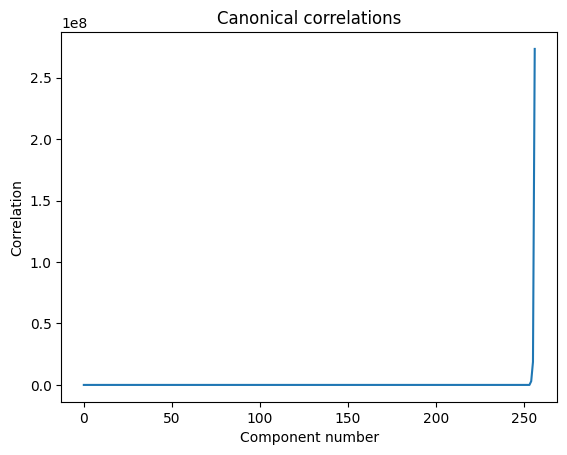

compressed dataset has shape of (1000, 3)


In [3]:
with open('sbi_demo_data.pkl', 'rb') as f:
    load = pickle.load(f)
    param_samples = load['params']
    cls_samples = load['cls']

cca_result = cca(param_samples, cls_samples)
print('compressed dataset has shape of',cca_result['compressed_cls'].shape)

### 2. Massive lossless data compression (MOPED)

In [30]:
def moped(param_samples, cls_samples, fiducial_cls_samples, perturbed_cls_samples, deltas, n_fiducial_samples, n_perturbed_samples):
    '''
    fiducial_cls used for covariance computation
    perturbed_cls used for mean derivative computation
    '''
    assert n_fiducial_samples >= n_perturbed_samples, "Number of fiducial samples must be greater than or equal to number of perturbed samples"

    cov_matrix = np.cov(fiducial_cls_samples.T)

    fiducial_cls_array = fiducial_cls_samples[:n_perturbed_samples,:]
    deriv = []
    for i, (direction, sims) in enumerate(perturbed_cls_samples.items()):
        perturbed_cls = sims['cls'][:n_perturbed_samples,:]
        deriv.append(np.mean(perturbed_cls - fiducial_cls_array, axis=0)/deltas[i]) #first order finite difference
        print('order of compression:', i+1, direction)
    deriv = np.array(deriv) # shape d_params x d_cls
    print('deriv shape:', deriv.shape)
    compression_matrix = np.zeros((param_samples.shape[1], cls_samples.shape[1])) # initialize compression matrix d_params x d_cls
    print('compression matrix shape:', compression_matrix.shape)

    for i in range(param_samples.shape[1]):
        invcov_deriv = np.linalg.solve(cov_matrix, deriv[i])
        if i>0:
            coefs = compression_matrix[:i,:]@deriv[i]
            print(invcov_deriv.shape)
            print('coefs shape:', coefs.shape)
            compression_matrix[i,:]= (invcov_deriv - compression_matrix[:i,:].T@coefs)/np.sqrt(deriv[i]@invcov_deriv- np.sum(coefs**2))
        else:
            compression_matrix[i,:]= (invcov_deriv)/np.sqrt(deriv[i]@invcov_deriv)

    compressed_cls = compression_matrix@cls_samples.T
    
    return {'params': param_samples, 'compressed_cls': compressed_cls}



In [104]:
# Generate fiducial data for MOPED compression

fiducial_params = {'h': 0.7, 'Oc': 0.3, 'Ob': 0.04}
n_fiducial_samples = 300

fiducial_param_samples = []
fiducial_cls_samples = []
for n in tqdm(range(n_fiducial_samples)):
    # sim = lensing_cls_sim(fiducial_params)
    fiducial_param_samples.append(sim['params'])
    fiducial_cls_samples.append(sim['cls'])
fiducial_param_samples = np.array(fiducial_param_samples)
fiducial_cls_samples = np.array(fiducial_cls_samples)

# print("Fiducial Params:\n", fiducial_param_samples)
# print("Fiducial Cls:\n", fiducial_cls_samples)

# with open('moped_fiducial_cls.pkl', 'wb') as f:
    # pickle.dump({'params': fiducial_param_samples, 'cls': fiducial_cls_samples}, f)

16it [00:00, 35.48it/s]
16it [00:00, 37.85it/s]
16it [00:00, 37.36it/s]
16it [00:00, 37.91it/s]
16it [00:00, 37.54it/s]
16it [00:00, 37.52it/s]
16it [00:00, 36.80it/s]
16it [00:00, 36.63it/s]
16it [00:00, 36.21it/s]
16it [00:00, 36.99it/s]
16it [00:00, 37.25it/s]
16it [00:00, 37.64it/s]
16it [00:00, 36.96it/s]
16it [00:00, 35.86it/s]
16it [00:00, 36.51it/s]
16it [00:00, 37.25it/s]
16it [00:00, 37.05it/s]
16it [00:00, 37.42it/s]
16it [00:00, 36.11it/s]
16it [00:00, 37.06it/s]
16it [00:00, 38.24it/s]
16it [00:00, 37.38it/s]
16it [00:00, 37.31it/s]
16it [00:00, 37.80it/s]
16it [00:00, 38.01it/s]
16it [00:00, 37.02it/s]
16it [00:00, 37.04it/s]
16it [00:00, 38.28it/s]
16it [00:00, 36.38it/s]
16it [00:00, 37.35it/s]
16it [00:00, 37.31it/s]
16it [00:00, 37.00it/s]
16it [00:00, 35.17it/s]
16it [00:00, 35.56it/s]
16it [00:00, 37.72it/s]
16it [00:00, 38.09it/s]
16it [00:00, 35.90it/s]
16it [00:00, 31.07it/s]
16it [00:00, 31.83it/s]
16it [00:00, 38.35it/s]
16it [00:00, 37.63it/s]
16it [00:00, 36.

In [146]:
# Generate perturbed data for MOPED compression, use predefiined fiducial parameters 

fiducial_params = {'h': 0.7, 'Oc': 0.3, 'Ob': 0.04}
delta_params = {'h': 0.05, 'Oc': 0.05, 'Ob': 0.005}
perturbations = {
    'dh': {'h': fiducial_params['h']+delta_params['h'], 'Oc': fiducial_params['Oc'], 'Ob': fiducial_params['Ob']},
    'dOc': {'h': fiducial_params['h'], 'Oc': fiducial_params['Oc']+delta_params['Oc'], 'Ob': fiducial_params['Ob']},
    'dOb': {'h': fiducial_params['h'], 'Oc': fiducial_params['Oc'], 'Ob': fiducial_params['Ob']+delta_params['Ob']}
}

perturb_cls = {}
n_perturb_samples = 50

for direction, perturb_params in perturbations.items():
    perturb_param_samples = []
    perturb_cls_samples = []
    for n in tqdm(range(n_perturb_samples)):
        # sim = lensing_cls_sim(perturb_params)
        perturb_param_samples.append(sim['params'])
        perturb_cls_samples.append(sim['cls'])
    # print("Fiducial Params:\n", fiducial_param_samples)
    # print("Fiducial Cls:\n", fiducial_cls_samples)
    temp_dict = {'params':np.array(perturb_param_samples), 'cls':np.array(perturb_cls_samples)}
    perturb_cls[direction] = temp_dict

# with open(f'moped_perturbed_cls.pkl', 'wb') as f:
#     pickle.dump(perturb_cls, f)

15it [00:00, 33.41it/s]00:00<?, ?it/s]
15it [00:00, 33.64it/s]00:03<03:06,  3.81s/it]
15it [00:00, 35.85it/s]00:07<03:02,  3.80s/it]
15it [00:00, 35.94it/s]00:11<02:57,  3.79s/it]
15it [00:00, 35.41it/s]00:15<02:52,  3.76s/it]
15it [00:00, 34.39it/s]00:18<02:47,  3.72s/it]
15it [00:00, 33.25it/s]00:22<02:45,  3.76s/it]
15it [00:00, 36.48it/s]00:26<02:40,  3.74s/it]
15it [00:00, 36.35it/s]00:29<02:36,  3.73s/it]
15it [00:00, 35.75it/s]00:33<02:32,  3.73s/it]
15it [00:00, 34.91it/s][00:37<02:30,  3.76s/it]
15it [00:00, 33.60it/s][00:41<02:27,  3.79s/it]
15it [00:00, 36.04it/s][00:45<02:23,  3.78s/it]
15it [00:00, 36.63it/s][00:49<02:20,  3.80s/it]
15it [00:00, 35.29it/s][00:52<02:17,  3.82s/it]
15it [00:00, 35.49it/s][00:56<02:14,  3.84s/it]
15it [00:00, 35.21it/s][01:00<02:10,  3.85s/it]
15it [00:00, 36.17it/s][01:04<02:06,  3.83s/it]
15it [00:00, 35.64it/s][01:08<02:02,  3.82s/it]
15it [00:00, 36.05it/s][01:11<01:57,  3.79s/it]
15it [00:00, 36.75it/s][01:15<01:53,  3.77s/it]
15it [00:0

In [32]:
with open('sbi_demo_data.pkl', 'rb') as f:
    load = pickle.load(f)
    param_samples = load['params']
    cls_samples = load['cls']

with open('moped_fiducial_cls.pkl', 'rb') as f:
    load = pickle.load(f)
    fiducial_cls_samples = load['cls']

with open('moped_perturbed_cls.pkl', 'rb') as f:
    load = pickle.load(f)
    perturb_cls = load

print(param_samples.shape)

moped_cls = moped(param_samples, cls_samples, fiducial_cls_samples, perturb_cls, [0.05, 0.05, 0.005], 300, 50)
print('MOPED compressed dataset has shape of',moped_cls['compressed_cls'].shape)

(1000, 3)
order of compression: 1 dh
order of compression: 2 dOc
order of compression: 3 dOb
deriv shape: (3, 257)
compression matrix shape: (3, 257)
(257,)
coefs shape: (1,)
(257,)
coefs shape: (2,)
MOPED compressed dataset has shape of (3, 1000)


/var/folders/yt/ybnb7bw10vj2y7213d6y2l_00000gn/T/ipykernel_78894/3888530631.py:27: RuntimeWarning: invalid value encountered in sqrt
  compression_matrix[i,:]= (invcov_deriv - compression_matrix[:i,:].T@coefs)/np.sqrt(deriv[i]@invcov_deriv- np.sum(coefs**2))


In [ ]:
def emoped(param_samples, cls_samples, fiducial_cls, perturbed_cls):
    '''
    fiducial_cls used for covariance computation
    perturbed_cls used for mean derivative computation
    '''
    return {'params': param_samples, 'compressed_cls': compressed_cls}

# Density Estimation
---